### **1. Test and filter outliers**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#### **Finding the type of outliers and Removing them**
IQR (Inter Quartile Range method is used to find the outliers in particular type of crops. Lower thresholds and Upper thresholds are defined and the data in filtered on the range of lower and upper threshold

In [2]:
#finding the outliers on the basis of different Types of crops and their msprice
def type_outliers(df):
    types=list(df["Type"].unique())
    for typ in types:
        data_temp=df[df["Type"]==typ] # Entire data of one type of crop
        actual=len(data_temp) # Total instances of each crop type
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)

In [3]:
def cmo_msp_remove_outliers(df):
    data = pd.DataFrame()
    commodities = list(df["commodity"].unique())
    for commodity in commodities:
        data_temp = df[df["commodity"]==commodity]
        actual_length = len(data_temp)
        if actual_length>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #interquartile range
            #defining the thresholds
            lower_threshold = q1-1.5*iqr
            upper_threshold = q3-1.5*iqr
            data_temp = data_temp.loc[(data_temp['msprice'] > lower_threshold) & (data_temp['msprice'] < upper_threshold)]
            data_temp.sort_values("year", inplace=True)
        data = pd.concat([data,data_temp])
        data.reset_index(drop=True,inplace=True)
    return data

In [4]:
def plot_outliers_commodities(df):
    commodities = list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_filter) #box plot
                sns.stripplot(x="commodity", y="msprice",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') #overlay data points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",df["Type"].iloc[0] )

### **Dataset: CMO_MSP_Mandi.csv**

In [25]:
data = pd.read_csv("F:/SocialCops Internship/Mandi Data/CMO_MSP_Mandi.csv")
data = data.dropna(subset=["msprice"])

In [26]:
data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


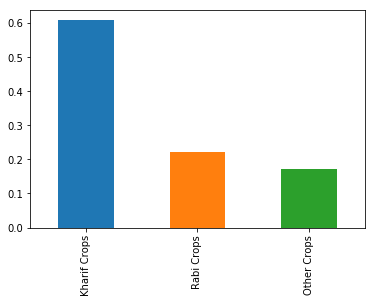

In [32]:
#Bar plot for different types of crops
(data['Type'].value_counts()/len(data)).plot.bar()

From the above bar graph, we can conclude than Kharif crops are more than Rabi Crops

### **Overall Boxplot Visualization**

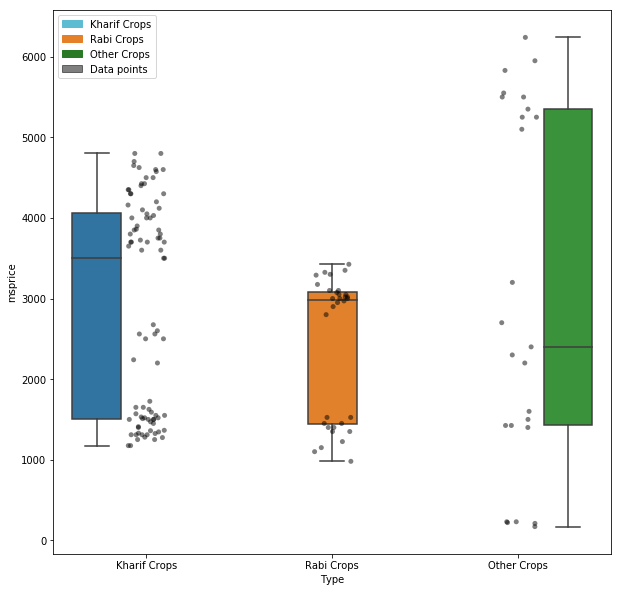

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type",y="msprice", hue="Type", data=data)
sns.stripplot(x="Type",y="msprice",data=data, jitter=True, marker='o',alpha=0.5,color='black')
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

### **Finding outliers for  particular type of crops**

In [8]:
type_outliers(data)

No outlier found in  Kharif Crops
No outlier found in  Rabi Crops
No outlier found in  Other Crops


### **Finding outliers for commodities in a particular type of crops**

**Kharif Crops**

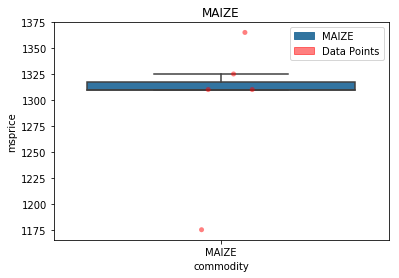

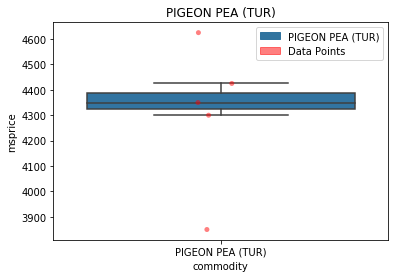

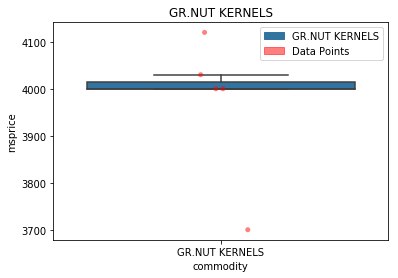

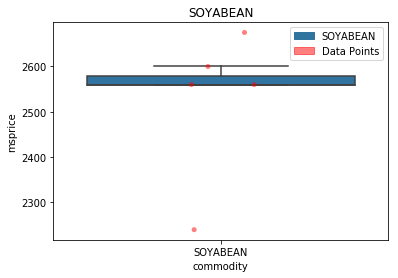

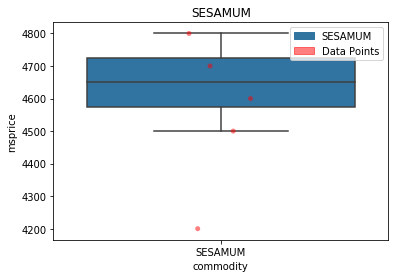

In [9]:
plot_outliers_commodities(data[data["Type"]=="Kharif Crops"])

**Rabi Crops**

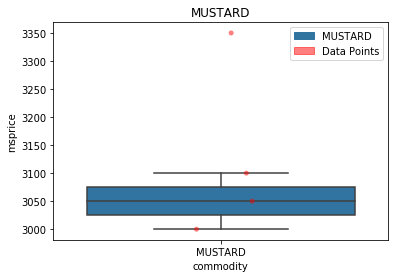

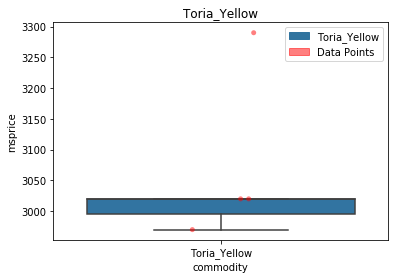

In [10]:
plot_outliers_commodities(data[data["Type"]=="Rabi Crops"])

**Other Crops**

In [11]:
plot_outliers_commodities(data[data["Type"]=="Other Crops"])

No commodity price outlier in  Other Crops


**Remove outliers and save as csv file**

In [12]:
data_without_outliers = cmo_msp_remove_outliers(data)
data.to_csv("CMO_MSP_Mandi_filtered.csv",index=False)

### **Dataset: Monthly_data_cmo.csv**

In [13]:
df=pd.read_csv("F:/SocialCops Internship/Mandi Data//Monthly_data_cmo.csv")
df["Commodity"]=df["Commodity"].apply( lambda x : x.lower())
df=df[df["modal_price"]!=0]
df.info()
#df["date"]=pd.to_datetime(df["date"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62225 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62225 non-null object
Commodity          62225 non-null object
Year               62225 non-null int64
Month              62225 non-null object
arrivals_in_qtl    62225 non-null int64
min_price          62225 non-null int64
max_price          62225 non-null int64
modal_price        62225 non-null int64
date               62225 non-null object
district_name      62225 non-null object
state_name         62225 non-null object
dtypes: int64(5), object(6)
memory usage: 5.7+ MB


Since, date column is showing object, converting it into datetime 

In [14]:
df["date"] =pd.to_datetime(df["date"])
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62225 entries, 0 to 62428
Data columns (total 11 columns):
APMC               62225 non-null object
Commodity          62225 non-null object
Year               62225 non-null int64
Month              62225 non-null object
arrivals_in_qtl    62225 non-null int64
min_price          62225 non-null int64
max_price          62225 non-null int64
modal_price        62225 non-null int64
date               62225 non-null datetime64[ns]
district_name      62225 non-null object
state_name         62225 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 5.7+ MB


(62225, 11)

In [15]:
apmc_list = df["APMC"].unique()
len(apmc_list)

349

#### **There are total 349 distinct APMC (Agriculture Produce Market Committees)**

##### **For finding and removing outliers**

IQR method is used

In [16]:
#finding outliers and removing them according to the modal price in each commodity
def remove_outliers(df):
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("date",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [18]:
def plot_price_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["Commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["modal_price"] > lower_threshold) & (data_temp["modal_price"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="Commodity", y="modal_price",data=data_filter) #box plot
                sns.stripplot(x="Commodity", y="modal_price",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') #overlay data points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No modal price outliers found" )

In [34]:
apmc = input("Enter APMC:")
comm = input('Enter Commodity within that APMC: ')

df_temp = df[df['APMC'] == apmc]
df_temp = df_temp[df['Commodity'] == comm]

plot_price_outliers(df_temp)

Enter APMC:Akole
Enter Commodity within that APMC: Mustard
No modal price outliers found


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [20]:
df_filtered = pd.DataFrame()
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outliers(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.shape

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(62225, 11)

In [21]:
df_filtered.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2014,September,24,1400,1750,1575.0,2014-09-01,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2014,November,395,1507,1750,1629.0,2014-11-01,Ahmadnagar,Maharashtra
2,Ahmednagar,bajri,2015,January,97,1472,1764,1618.0,2015-01-01,Ahmadnagar,Maharashtra
3,Ahmednagar,bajri,2015,February,10,1500,1800,1650.0,2015-02-01,Ahmadnagar,Maharashtra
4,Ahmednagar,bajri,2015,March,14,1350,1700,1525.0,2015-03-01,Ahmadnagar,Maharashtra


In [22]:
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("Monthly_data_cmo_filtered.csv",index=False)